In [1]:
from Trainer import Trainer
from DataWork import mnist
from model.Layer import Layer
from model.PerceptronClassifier import ReLU
from model.PerceptronClassifier import PerceptronClassifier
from model.PerceptronClassifier import SoftMaxCrossEntropy
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train, X_test, y_test) = mnist()

In [3]:
layers = [
    Layer(input_size=28 * 28, output_size=32, bias=True),
    ReLU(),
    Layer(input_size=32, output_size=14, bias=True),
    ReLU(),
    Layer(input_size=14, output_size=10, bias=True),
    ReLU()
]

In [4]:

model = PerceptronClassifier(layers)
train_loss = Trainer(model, SoftMaxCrossEntropy()).fit(X_train, y_train, lr=1e-3, epoch_count=50, batch_size=3)

avg_epoch_loss: 0.09808541712938855: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:20<00:00,  4.02s/it]


In [5]:
from Trainer import test_classificator

print(test_classificator(model, X_test, y_test))

              precision    recall  f1-score   support

           0       0.51      0.98      0.68       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.93      0.97      0.95      1010
           4       0.92      0.98      0.95       982
           5       0.93      0.95      0.94       892
           6       0.97      0.96      0.97       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.87     10000
   macro avg       0.81      0.87      0.83     10000
weighted avg       0.81      0.87      0.83     10000



D:\Prog\MLka\2_try\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Prog\MLka\2_try\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Prog\MLka\2_try\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


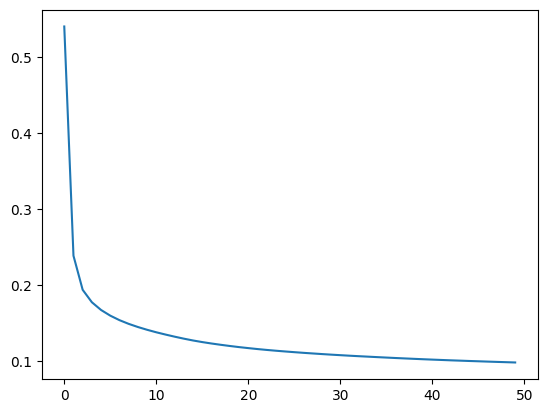

In [6]:
model.store_model(Path('./EndPoint/1.pkl'))
plt.plot(np.array(train_loss))